<a href="https://colab.research.google.com/github/Antara999333/Assignment-6-AIPI/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Duke-AI-XAI" # Change to your repo name
git_path = "https://github.com/Antara999333/Assignment-6-AIPI.git"  # Change to your path
!git clone "{git_path}"


Cloning into 'Assignment-6-AIPI'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


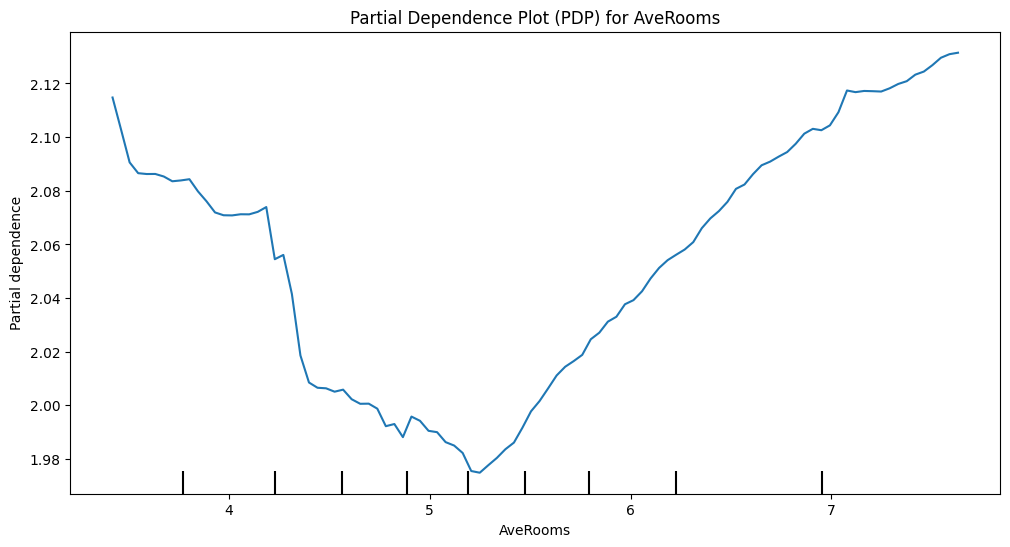

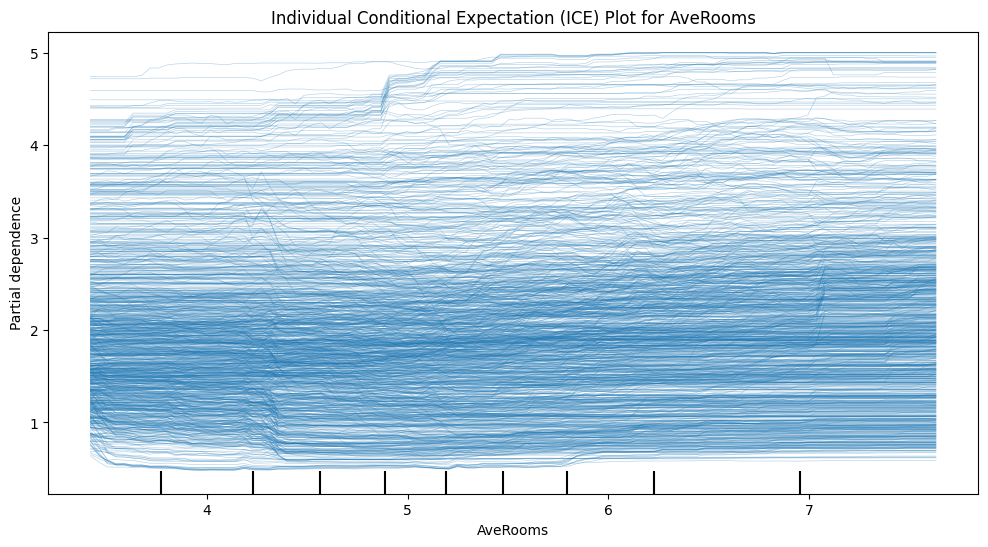

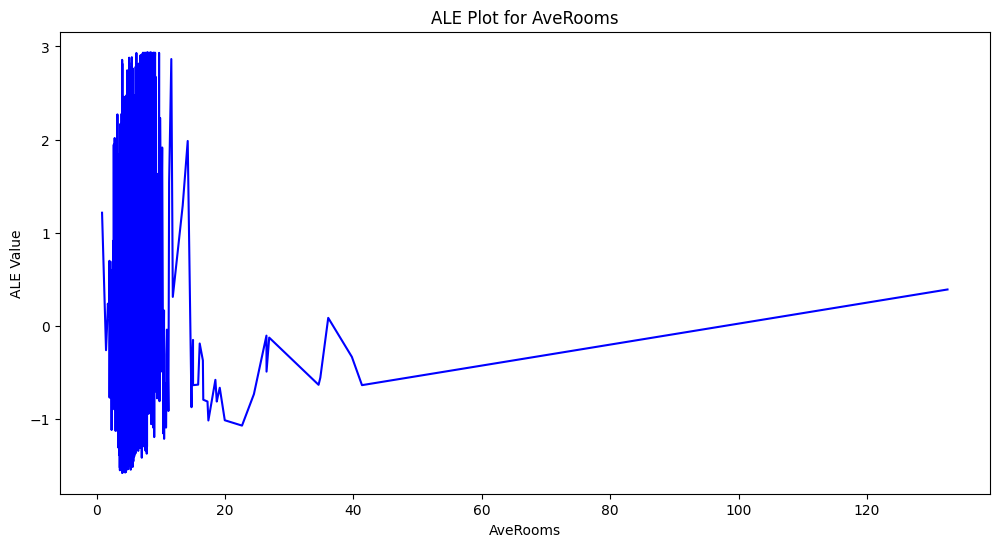

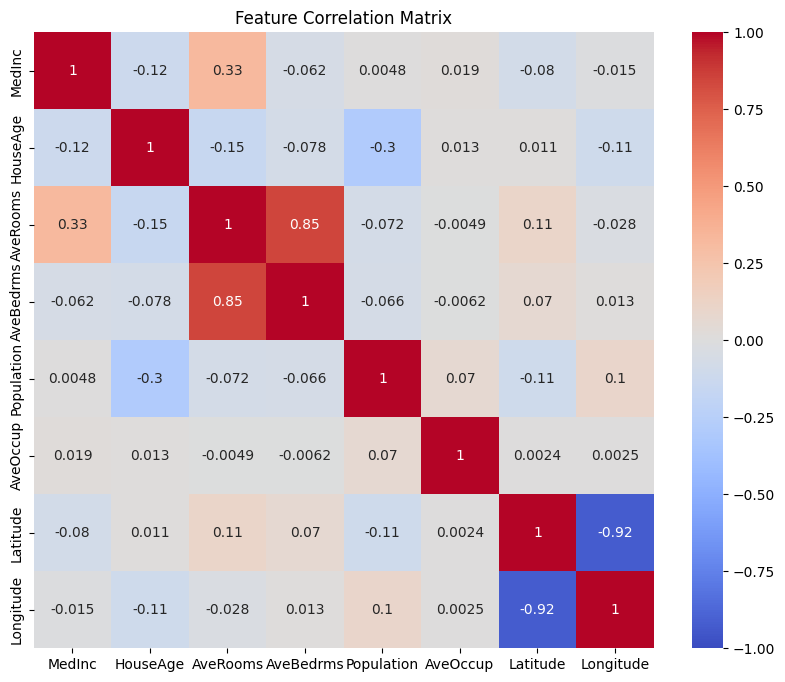

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select the feature for PDP and ICE plots
feature = 'AveRooms'

# Partial Dependence Plot (PDP)
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, X_test, [feature], ax=ax, kind='average')
plt.title('Partial Dependence Plot (PDP) for {}'.format(feature))
plt.show()

# Individual Conditional Expectation (ICE) Plot
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, X_test, [feature], ax=ax, kind='individual')
plt.title('Individual Conditional Expectation (ICE) Plot for {}'.format(feature))
plt.show()

# Accumulated Local Effects (ALE) Plot
def ale_plot(model, X, feature, ax):
    # Compute the ALE values
    X_sorted = X.sort_values(feature)
    predictions = model.predict(X_sorted)  # Predict for all sorted data at once
    base_prediction = model.predict(X).mean()  # Base prediction for the entire dataset
    ale_values = np.zeros(X_sorted.shape[0])

    for i in range(len(X_sorted)):
        # Calculate the average prediction for all values above the current one
        ale_values[i] = predictions[i] - base_prediction

    ax.plot(X_sorted[feature], ale_values, label='ALE', color='blue')
    ax.set_title(f'ALE Plot for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('ALE Value')

fig, ax = plt.subplots(figsize=(12, 6))
ale_plot(model, X_test, feature, ax)
plt.show()

# Feature Correlation Matrix
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()
